In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ZADANIE 1

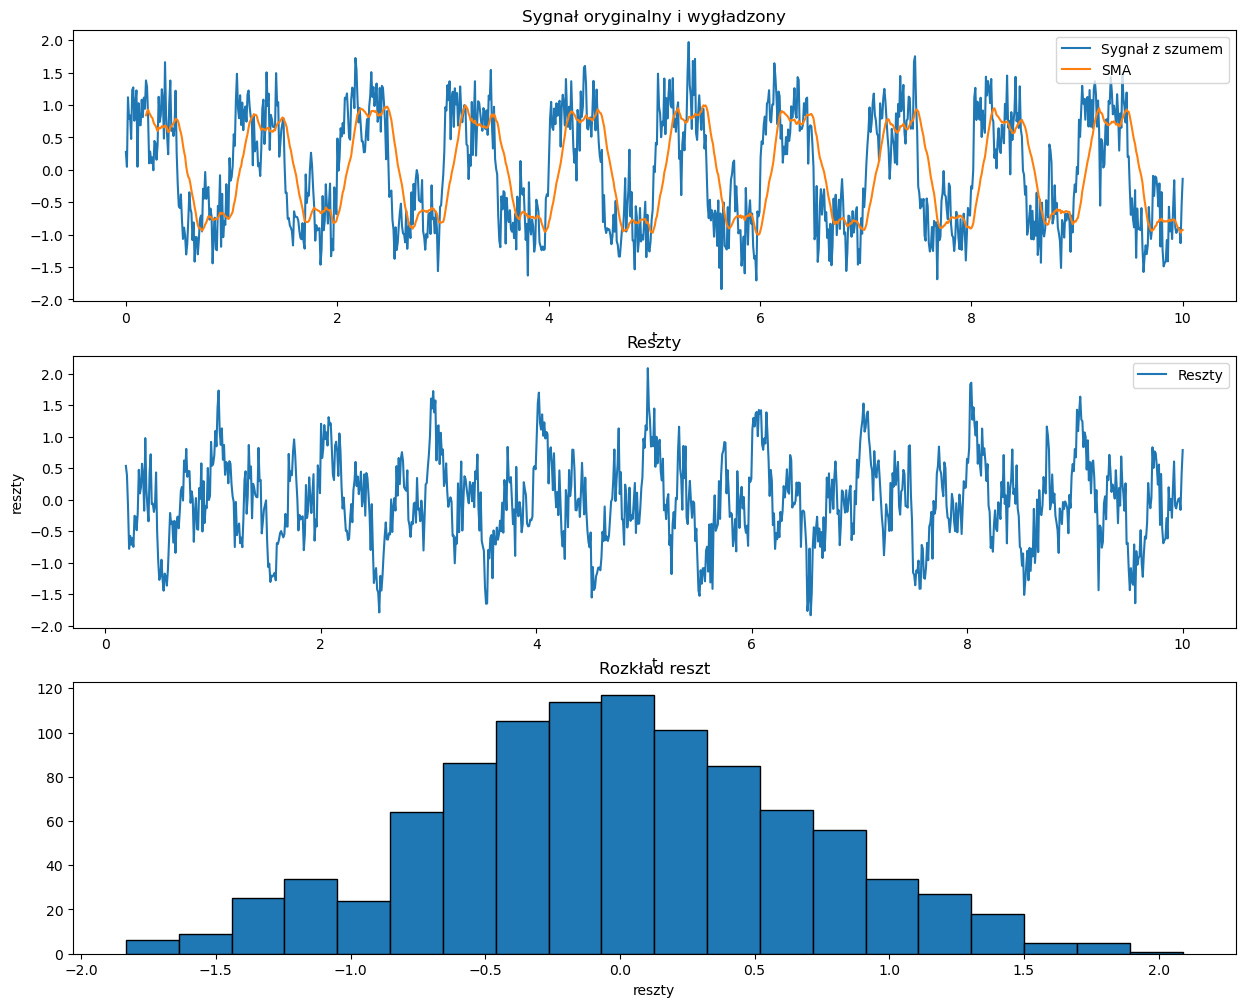

In [2]:
t = np.linspace(0,10,1000)
czysty = 1.0 * np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 3 * t) + 0.3 * np.sin(2 * np.pi * 7 * t)

szum = np.random.normal(0, 0.3, len(t))
sygnal_z_szumem = czysty + szum

df = pd.DataFrame({'sygnal': sygnal_z_szumem})
df['sma'] = df['sygnal'].rolling(window=20).mean()


fig, ax = plt.subplots(3, 1, figsize=(15,12))
ax[0].plot(t, sygnal_z_szumem, label = 'Sygnał z szumem')
ax[0].plot(t, df['sma'], label = 'SMA')
ax[0].set_title('Sygnał oryginalny i wygładzony')
ax[0].legend()
ax[0].set_xlabel('t')

df['reszty'] = df['sygnal'] - df['sma']

ax[1].plot(t, df['reszty'], label = 'Reszty')
ax[1].set_title('Reszty')
ax[1].set_xlabel('t')
ax[1].set_ylabel('reszty')
ax[1].legend()

ax[2].hist(df['reszty'].dropna(), bins=20, edgecolor='black')
ax[2].set_title('Rozkład reszt')
ax[2].set_xlabel('reszty')
plt.show()






ZADANIE 2

               Średnia    Mediana  Odchylenie Stand   Wariancja
Normal       51.147010  50.728998         14.119995  199.374255
Exponential   0.507317   0.358321          0.496604    0.246615
Uniform      51.364540  51.406563         28.120921  790.786181
Signal        0.075865   0.752893          7.313458   53.486668


P33 = 0.46836597864878815, P66 = 0.6142214528954524
      Normal   Klasa
0  30.995300  Wysoki
1  60.389901  Wysoki
2  30.948076  Wysoki
3  51.034796  Wysoki
4  45.399550  Wysoki
               Normal  Exponential   Uniform    Signal
Normal       1.000000    -0.067335  0.004448 -0.048617
Exponential -0.067335     1.000000 -0.113971  0.017740
Uniform      0.004448    -0.113971  1.000000  0.034510
Signal      -0.048617     0.017740  0.034510  1.000000


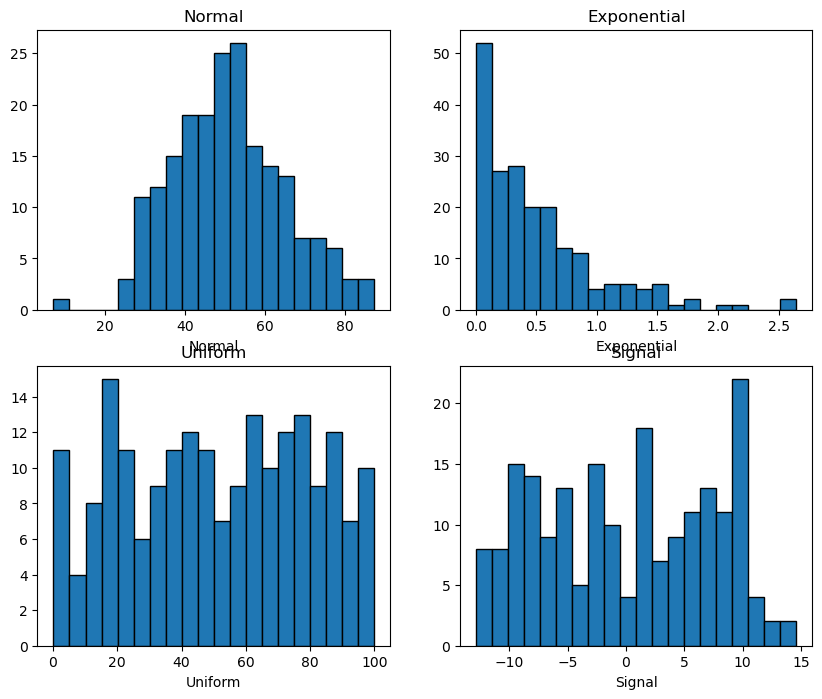

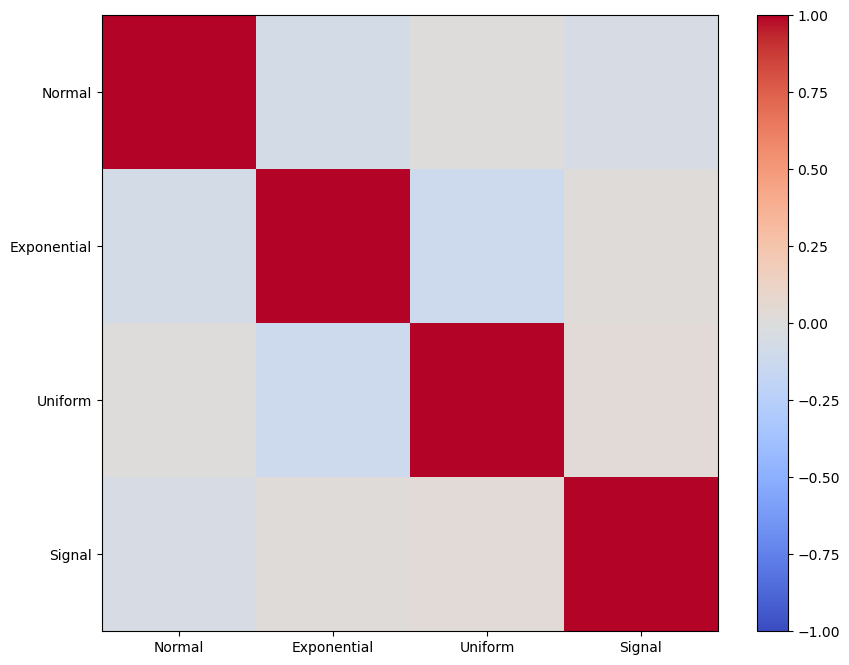

In [3]:
n = 200
t = np.linspace(0, 4 * np.pi, n)

ID = np.arange(1, n+1)
Normal = np.random.normal(50, 15, n)
Exponential = np.random.exponential(1/2, n)
Uniform = np.random.uniform(0, 100, n)
Category = np.random.choice([1,2,3,4], size = n, p = [0.4, 0.3, 0.2, 0.1])
Signal = 10 * np.sin(t) + np.random.normal(0, 2, n)

df = pd.DataFrame(
    {
        'ID': ID,
        'Normal': Normal,
        'Exponential': Exponential,
        'Uniform': Uniform,
        'Category': Category,
        'Signal': Signal
    }
)

df.to_csv("dane.txt", sep=' ', index=False)

df = pd.read_csv("dane.txt", sep=' ')

num_cols = ['Normal', 'Exponential', 'Uniform', 'Signal']
stats = pd.DataFrame(
    {
        'Średnia': df[num_cols].mean(),
        'Mediana': df[num_cols].median(),
        'Odchylenie Stand': df[num_cols].std(),
        'Wariancja': df[num_cols].var()
    }
)

print(stats)
print()
print()

#Normalizacja MIN MAX
X = df['Normal']

Xnorm = (X - min(X))/(max(X) - min(X))
p33, p66 = np.percentile(Xnorm, [33, 66])
df['Klasa'] = pd.cut(
    X,
    bins=[-np.inf, p33, p66, np.inf],
    labels=['Niski', 'Średni', 'Wysoki']
)
print(f"P33 = {p33}, P66 = {p66}")
print(df[['Normal', 'Klasa']].head())

#Korelacja
corr = np.corrcoef(df[num_cols].T)
corr_df = pd.DataFrame(corr, index=num_cols, columns=num_cols)

print(corr_df)

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    ax[i].hist(df[col], bins=20, edgecolor='black')
    ax[i].set_title(col)
    ax[i].set_xlabel(col)

plt.show()

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(corr_df, cmap='coolwarm', vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(num_cols)))
ax.set_yticks(np.arange(len(num_cols)))
ax.set_xticklabels(num_cols)
ax.set_yticklabels(num_cols)
fig.colorbar(im, ax=ax)
plt.show()

ZADANIE 3

[[ 1.         -0.01805395 -0.64871088]
 [-0.01805395  1.          0.16837212]
 [-0.64871088  0.16837212  1.        ]]


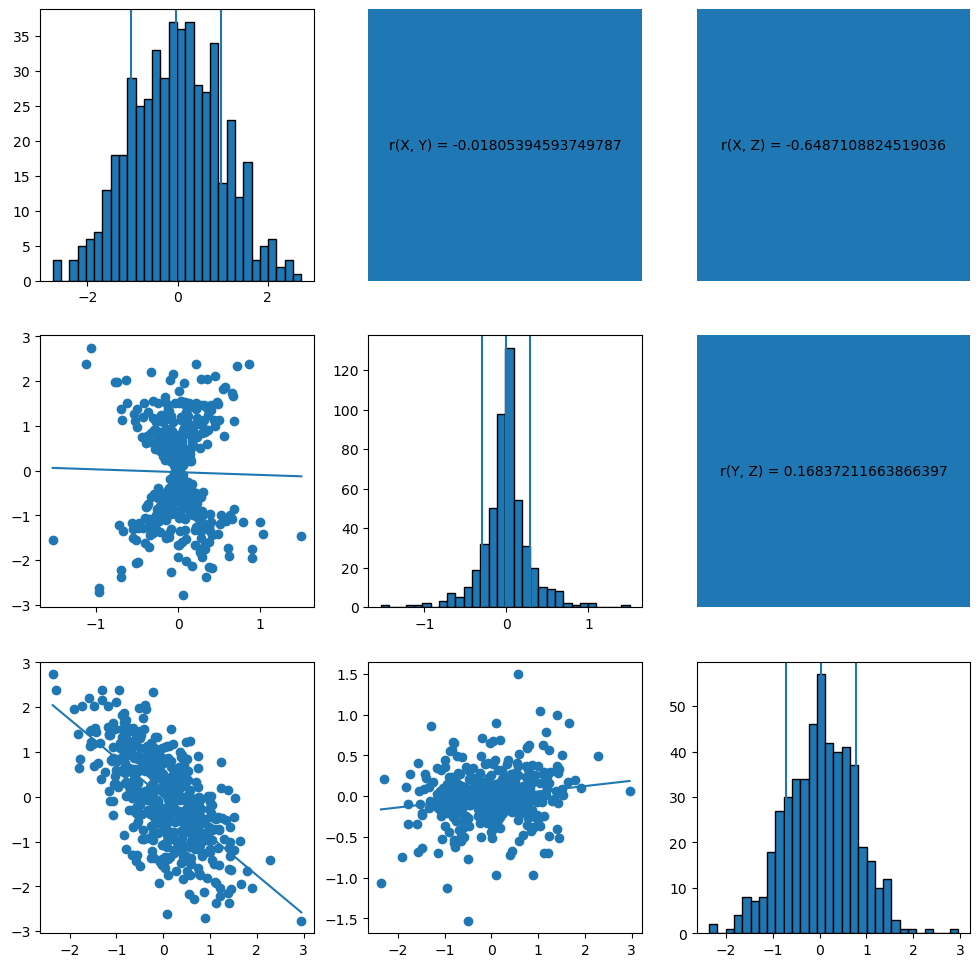

In [21]:
N = 500
X = np.random.normal(0, 1, N)
eps_y = np.random.normal(0, np.sqrt(0.2), N)
Y = 0.7 * X * eps_y
eps_z = np.random.normal(0, np.sqrt(0.3), N)
Z = -0.5 * X + 0.4 * Y + eps_z

D = np.column_stack((X, Y, Z))
R = np.corrcoef(D.T)
print(R)

srednie = D.mean(axis = 0)
odchylenia = D.std(axis = 0)
Xnorm = (X - srednie[0]) / odchylenia[0]
Ynorm = (Y - srednie[1]) / odchylenia[1]
Znorm = (Z - srednie[2]) / odchylenia[2]

fig, axes = plt.subplots(3, 3, figsize=(12,12))
series = [X, Y, Z]
labels = ['X', 'Y', 'Z']

for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if i == j:
            ax.hist(series[i], bins=30, edgecolor='black')
            ax.axvline(srednie[i])
            ax.axvline(srednie[i] - odchylenia[i])
            ax.axvline(srednie[i] + odchylenia[i])

        elif i > j:
            ax.scatter(series[i], series[j])
            beta1, beta0 = np.polyfit(series[i], series[j], 1)
            x_line = np.linspace(series[i].min(), series[i].max(), 200)
            y_line = beta1 * x_line + beta0
            ax.plot(x_line, y_line)

        else:
            r = R[i,j]
            ax.axis('off')
            text = f"r({labels[i]}, {labels[j]}) = {r}"
            ax.add_patch(plt.Rectangle((0, 0), 1, 1, ))
            ax.text(0.5, 0.5, text, ha='center', va='center')

plt.show()